# Exercise sheet 5

## Exercise 1: Back to the Kalahari

During the course we discussed on how to assess the causal effect of gender (S) on weight (W). To quantify the direct influence of gender on weight, we had to build a second model. In the course, we took into account the causes at the model design stage. It is also possible to do the opposite, and build a single model that encapsulates the full causal framework and then simulate interventions on parameters of interest. We could use the model output to investigate the the effect of overriding S to specific values and investigate the same science questions as in the course.

1. Design such a model using the statistical description described in the course and run it in R using quadratic approximation.


In [1]:
# Loading the package and the data
library(rethinking)
data(Howell1)
# Dataset of the Kalahari population
d <- Howell1

d <- d[d$age >= 18, ]

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0

Lade nötiges Paket: parallel

rethinking (Version 2.31)


Attache Paket: 'rethinking'


Das folgende Objekt ist maskiert 'package:rstan':

    stan


Das folgende Objekt ist maskiert 'package:stats':

    rstudent




The statistical description used in the course was

$$W_i \sim \text{Normal}(\mu_i, \sigma)$$

with

$$\mu_i = \alpha_{S[i]} + \beta_{S[i]}(H_i - \langle H \rangle),$$

where $\alpha$ and $\beta$ are categorical variables dependent on the gender, $H_i$ is the height and $\langle H \rangle$ indicateds the mean or median height. We will use the priors

$$\alpha \sim \text{Normal}(60, 10),\ \beta \sim \text{LogNormal}(0,1),\ \sigma \sim \text{Uniform}(0, 10).$$

In [2]:
dat <- list(
	W = d$weight,
	H=d$height,
	Hbar = mean(d$height),
	S=d$male + 1
)
model <- map(
	alist(
		W ~ dnorm(mu, sigma),
		mu <- a[S] + b[S] * (H - Hbar),
		a[S] ~ dnorm(60, 10),
		b[S] ~ dlnorm(0, 1),
		sigma ~ dunif(0, 50),
		H ~ dnorm(nu, tau),
		nu <- h[S],
		h[S] ~ dnorm(160, 10),
		tau ~ dunif(0, 10)
	),
	data = dat
)
post <- extract.samples(model)

If that would work then we would sample the posterior distribution and consider the dependence between the parameters $a$ and $b$ for both men and women.

,a___1,a___2,b___1,b___2,sigma,h___1,h___2,tau
a___1,0.051,0,0.000,0.000,0.000,0.000,0,0.000
a___2,0.000,100,0.000,0.000,0.000,0.000,0,0.000
b___1,0.000,0,0.001,0.000,0.000,0.000,0,0.000
b___2,0.000,0,0.000,0.136,0.000,0.000,0,0.000
sigma,0.000,0,0.000,0.000,0.025,0.000,0,0.000
h___1,0.000,0,0.000,0.000,0.000,0.169,0,0.000
h___2,0.000,0,0.000,0.000,0.000,0.000,100,0.000
tau,0.000,0,0.000,0.000,0.000,0.000,0,0.085


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


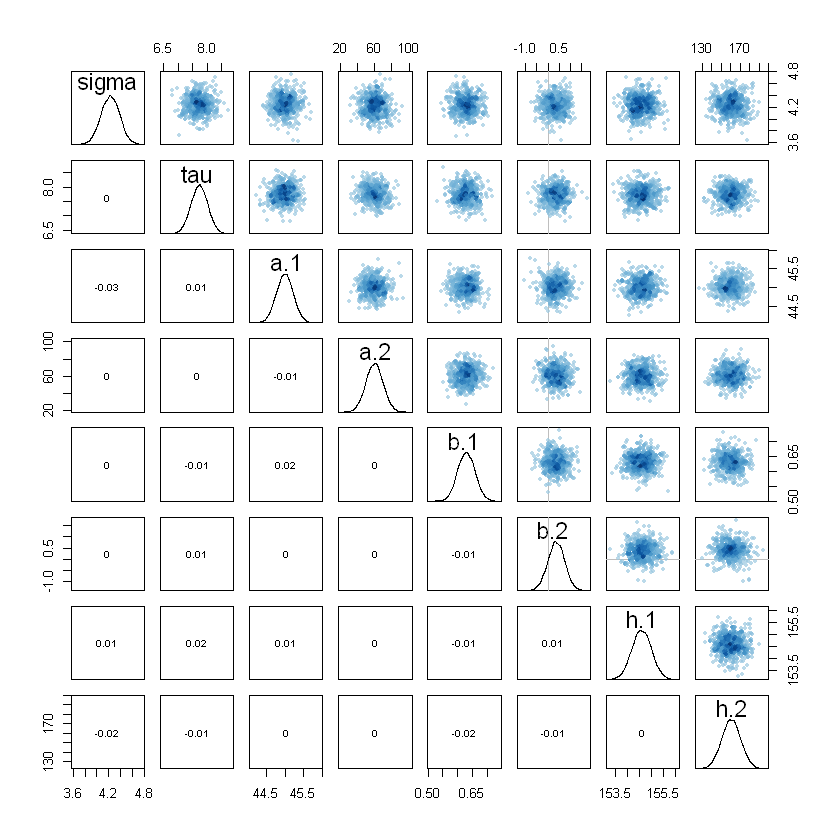

In [9]:
round(vcov(model), 3)
pairs(model)

Further we would create a plot as given on slide 20 of the lecture notes 4.

In [10]:
xseq <- seq(from = 130, to = 190, len = 50)
muF <- link(model, data  = list(
	S = rep(1, 50),
	H = xseq,
	Hbar = mean(d$height)
))
muM <- link(model, data  = list(
	S = rep(2, 50),
	H = xseq,
	Hbar = mean(d$height)
))
mu_contrast <- muF - muM
plot(NULL, xlim = range(xseq), ylim = c(-6, 8))
for (p in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.997)) {
	shade(apply(mu_contrast, 2, HPDI, prob = p), xseq)
}
abline(h = 0, col = "red")

ERROR: Error in muF - muM: nicht-numerisches Argument für binären Operator
